# Explore Word Vector representation tools

## Summary:
- load a pre-existing [vectorial representation](https://spacy.io/models/en#en_core_web_md) trained with GloVe vectors on Common Crawl. Using [https://spacy.io/](spacy)
- get the vectors for a set of simple words, explore one
- reduce the view to 2d and display the proximity/distance between the words, develop intution if it

In [41]:
import numpy as np
import pandas as pd
import spacy
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA

# the pretrained model has been loaded
# nlp = spacy.load('en_core_web_sm')
nlp = spacy.load('en_core_web_sm')

In [42]:
# setting up a random se of words, to explore semantic proximity
animals = "dog cat hamster lion tiger elephant cheetah monkey gorilla antelope rabbit mouse rat zoo home pet fluffy wild domesticated car zebra"
# adding one word which is a very foreign word to all these animal-related words, and another which is very close, instead

animal_tokens = nlp(animals)
animal_vectors = np.vstack([word.vector for word in animal_tokens if word.has_vector])

### Example of VECTOR WEIGHTS for one of the words

In [43]:
print( len(animal_vectors)  )
print()
print( animal_vectors[0] )

21

[-1.2253186   0.48283246  1.8988055  -0.14034748 -1.1382704   0.8225011
 -2.506244   -1.9716864  -1.3009443   4.7104487   0.47494966  0.98504716
 -0.76870805 -3.4992585   3.5168748  -0.4088258   1.4173169   0.11050826
 -1.5918021   2.0988681   0.576403    5.9649844  -1.2763971  -1.6271205
  0.35550857 -0.95031923 -0.68944335 -0.66174597  1.3912871  -1.2351348
 -0.8996403   0.8542564  -0.9274533  -2.1061308   0.17213833  2.772962
 -0.43829966 -0.8499148  -0.8382342  -0.34796286  1.9868338   3.8068864
 -0.30435818 -0.18193556  1.2747698  -1.2289678  -0.04339464  2.676506
 -2.227365   -0.8743099  -2.1018553   0.1842668   0.74221957 -1.4903677
 -2.7009132   2.781874    2.2634861  -3.5285223  -2.1137114   3.0105977
  0.55836266  0.1810838   3.4493496  -3.0661838   1.9710047   2.339511
  0.6274071   0.5435344   0.1152676  -0.3839146  -0.41764632  3.1731486
 -0.4412468  -1.5006804  -1.1212126  -1.2766266  -0.02224329  1.7258081
 -0.94768494  1.6708235  -0.00803649  0.32926202  0.07223809 

In [44]:
# use pca to visualise proximity
pca = PCA(n_components=2)
animal_vecs_transformed = pca.fit_transform(animal_vectors)
animal_vecs_transformed = np.c_[animals.split(), animal_vecs_transformed]

In [45]:
animal_vecs_transformed_df = pd.DataFrame( animal_vecs_transformed, columns=['word','pa1','pa2'] )
animal_vecs_transformed_df["pa1"] = pd.to_numeric(animal_vecs_transformed_df["pa1"], downcast="float")
animal_vecs_transformed_df["pa2"] = pd.to_numeric(animal_vecs_transformed_df["pa2"], downcast="float")

In [46]:
print( animal_vecs_transformed_df.shape, animal_vecs_transformed_df.columns, animal_vecs_transformed_df.dtypes)

(21, 3) Index(['word', 'pa1', 'pa2'], dtype='object') word     object
pa1     float32
pa2     float32
dtype: object


In [47]:
#animal_vecs_transformed_df[ ['pa1','pa2'] ]
animal_vecs_transformed_df.head()

,word,pa1,pa2
0,dog,-5.802651,5.131534
1,cat,-2.178609,0.166273
2,hamster,-3.485075,6.762059
3,lion,-1.139042,-0.452645
4,tiger,-10.624687,3.661738


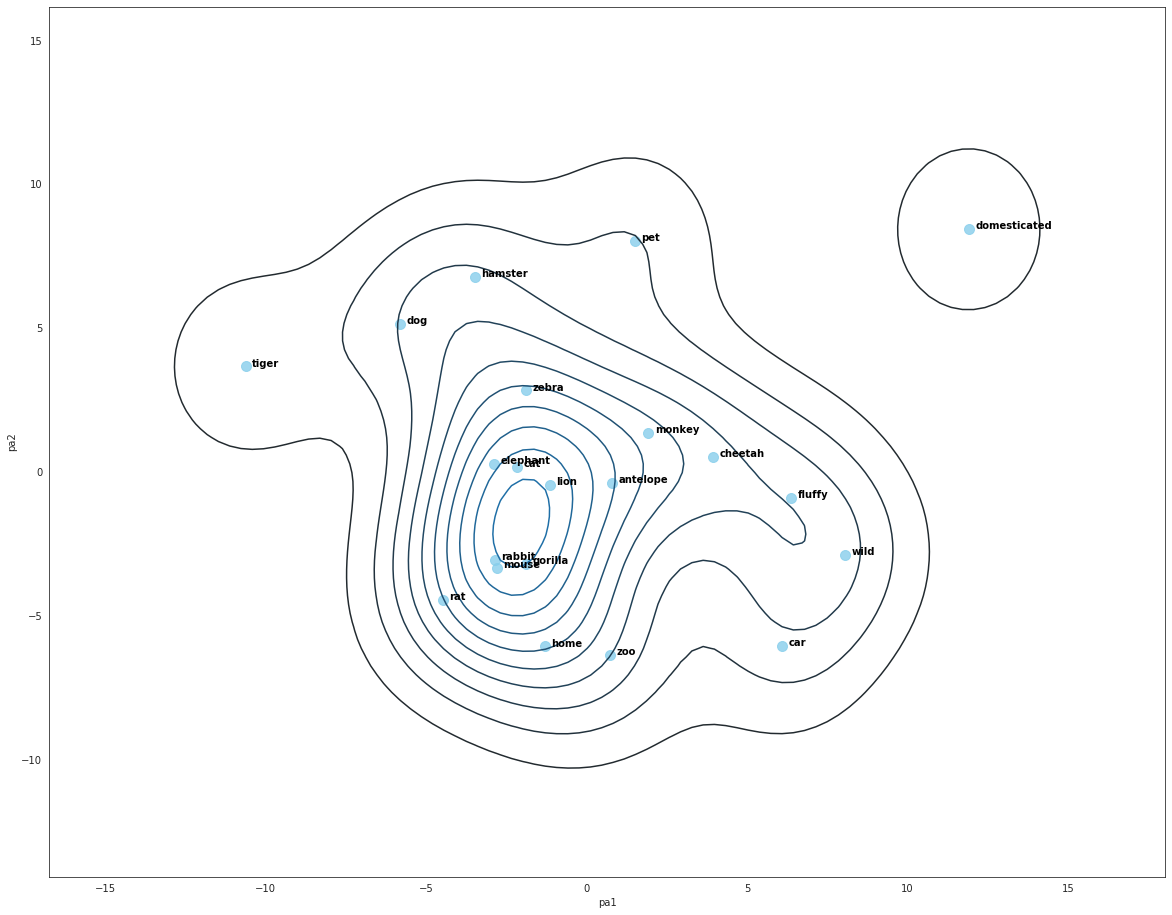

In [48]:
# Basic 2D density plot
sns.set_style("white")
sns.kdeplot(animal_vecs_transformed_df['pa1'], animal_vecs_transformed_df['pa2'])

plt.rcParams['figure.figsize'] = [20, 16]
# plt.figure(figsize=(16, 6))


# basic plot
p1=sns.regplot(data=animal_vecs_transformed_df, x="pa1", y="pa2", fit_reg=False, marker="o", color="skyblue", scatter_kws={'s':100})
 
# add annotations one by one with a loop
for line in range(0,animal_vecs_transformed_df.shape[0]):
     p1.text(animal_vecs_transformed_df.pa1[line]+0.2, animal_vecs_transformed_df.pa2[line], 
             animal_vecs_transformed_df.word[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

tips = sns.load_dataset("tips")
tips.head()

<class 'pandas.core.frame.DataFrame'> (244, 7) Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


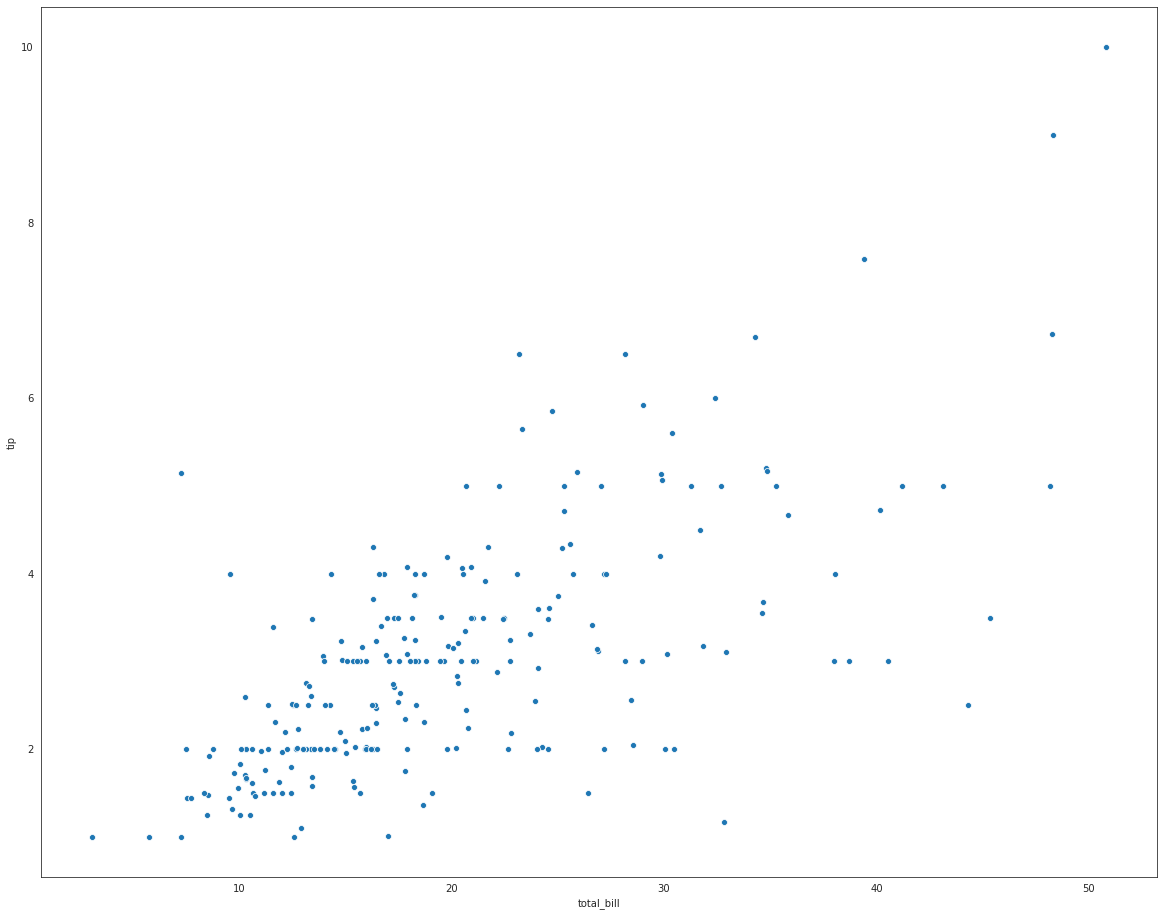

In [50]:
print( type(tips), tips.shape, tips.columns  )
sns.scatterplot(data=tips, x="total_bill", y="tip")